
# Project: Invistigating TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be investigating TMDb movie data, and I intend to answer some questions that are given to generate insights regarding the analysis that will be done in this file.

Question such as :

1- Which genres are most popular from 2010 to 2015?
2- What is the relation between Budget and revenues ? Does more budget means more revenue ?


In [65]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [66]:
# Loading and having a look at the data set :
df = pd.read_csv("tmdb-movies.csv")

In [67]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [68]:
df.shape

(10866, 21)

In [69]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [70]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Checking Duplicated Rows

In [71]:
# Function that returns number of duplicated row in a DataFrame
def duplicated_row(df):
    print( f"There is Duplicated rows, And Number of duplicated rows is : {df.duplicated().sum()}" if df.duplicated().sum() > 0 else ", There is NO duplicated rows" )


# Finding if there are any Duplicated rows :
duplicated_row(df=df)


There is Duplicated rows, And Number of duplicated rows is : 1


### Checking if Duplicated Row Can Affect Our Data

In [72]:
# Finding Rows
df[df.duplicated( keep=False)]
# Assign For Plotting or viewing
DupRow = df[df.duplicated( keep=False)]
DupRow.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


####  Note : It does affect since all cells from each row are the same, due to that, We will drop the Duplicated rows

### Checking if there are any null values

In [73]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Dropping Rows that are not needed ( Duplicated or having null values )

In [74]:
# Dropping null rows
df.dropna(inplace=True)
# Dropping duplicated rows
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### First Question: Which genres are most popular from 2010 to 2015?

#### First, Let's Make a new data frame containing the columns we need to deal with freely.

In [75]:
# Creating the new DataFrame:
new_DF =  df[['release_year','popularity','genres']].copy()

# Making it descending from Most to the lowest popularity:
new_DF.sort_values(by=['popularity'])
new_DF.head(5)

,release_year,popularity,genres
0,2015,32.985763,Action|Adventure|Science Fiction|Thriller
1,2015,28.419936,Action|Adventure|Science Fiction|Thriller
2,2015,13.112507,Adventure|Science Fiction|Thriller
3,2015,11.173104,Action|Adventure|Science Fiction|Fantasy
4,2015,9.335014,Action|Crime|Thriller


#### having only rows that has a release year between 2010 and 2015.
> in that way we are only daeling with data that is above or equal to 2010, and lesser or qual to 2015

In [76]:
new_DF = new_DF.loc[(df['release_year'] >= 2010) & (df['release_year'] <= 2015) ]
# checking minimum release year for confirmation, should equal 2010
print(new_DF['release_year'].min()) # should print 2010
print(new_DF['release_year'].max()) # should print 2015

2010
2015


### Cleaning: Converting a multi-valued column cell to a list-type value, so that we can convert it to Multiple rows by using EXPLODE method and makes it easier to deal with.

In [77]:
# coverting multi-valued cell to a list
new_DF['genres'] = new_DF['genres'].str.split('|')
# Converting columns with list to multiple rows
new_DF = new_DF.explode('genres')
# viewing changes
new_DF.head()


,release_year,popularity,genres
0,2015,32.985763,Action
0,2015,32.985763,Adventure
0,2015,32.985763,Science Fiction
0,2015,32.985763,Thriller
1,2015,28.419936,Action


### Taking a look at our data more
> #### - How many genres we are talking about ?
> #### - Which genre where occurred the most ?

In [78]:
# Displaying each genre count
new_DF['genres'].value_counts()

Drama              417
Comedy             303
Thriller           299
Action             269
Adventure          167
Horror             150
Science Fiction    147
Romance            131
Crime              120
Family             102
Fantasy             95
Animation           84
Mystery             69
Documentary         63
Music               36
History             26
War                 22
Western             15
TV Movie            10
Foreign              2
Name: genres, dtype: int64

> **observation**: as we can see from the information above, Drama is the value of the most occurrences.
> ### **But, is it the most popular from the rest of the other genres ?**

### Plotting the Genres with their popularity:
> #### To define the genre with the most popularity

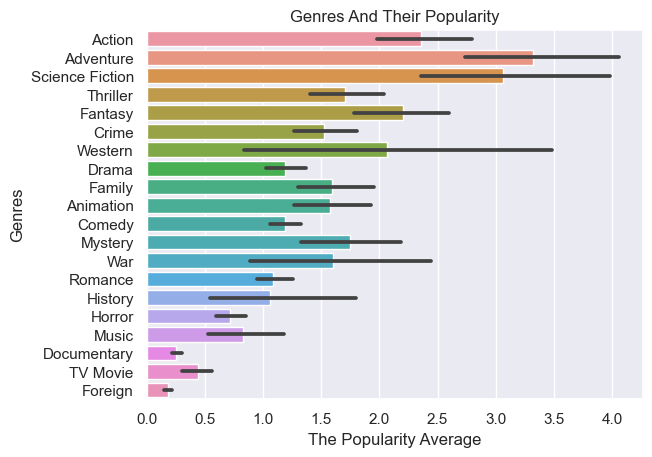

In [79]:
newDf_fig = sns.barplot(data=new_DF, x="popularity", y="genres")
plt.xlabel("The Popularity Average")
plt.ylabel("Genres")
plt.title("Genres And Their Popularity")
plt.show(newDf_fig)

### Observations:
> As we can see the most popular genre from 2010 to 2015 is:
>
> > 1 - Adventure
>
> > 2 - Science fiction
>
> > 3 - Action
>
> So, Adventure is the most popular genre from 2010 until 2015, based on our data.

## Second Question: What is the relation between Budget and revenues ? Does more budget means more revenue ?

#### First, Let's take a look at the revenue Column

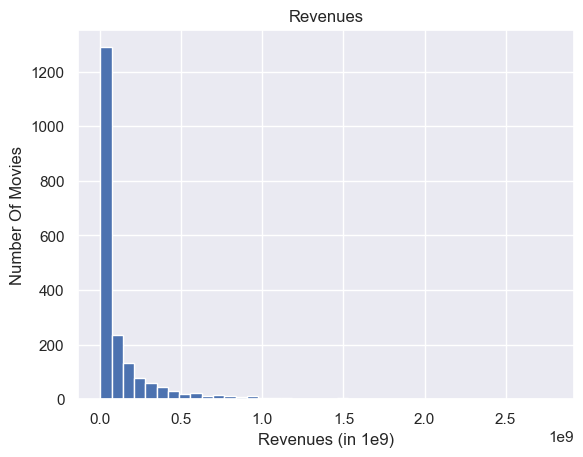

In [80]:
# Revenue figure
revenueHist = df['revenue'].hist(bins=40)
plt.xlabel("Revenues (in 1e9)")
plt.ylabel("Number Of Movies")
plt.title("Revenues")
plt.show(revenueHist)


#### Let's Plot The Scatter Of The Budget and Revenue Columns:
> To Make it Easier To Find Correlations Between The Values For Each Column

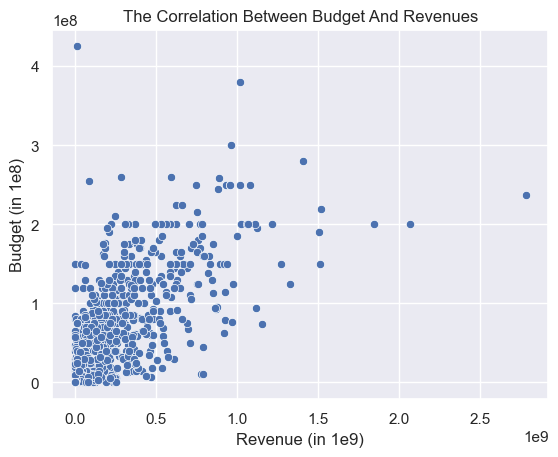

In [81]:
# Using Seaborn For Plotting The Scatter Of The Budget and Revenue Columns
ScatterPlot = sns.scatterplot(data=df, x="revenue", y="budget")
plt.xlabel("Revenue (in 1e9)")
plt.ylabel("Budget (in 1e8)")
plt.title("The Correlation Between Budget And Revenues")
plt.show(ScatterPlot)

#### Plotting Another Chart, Line Chart

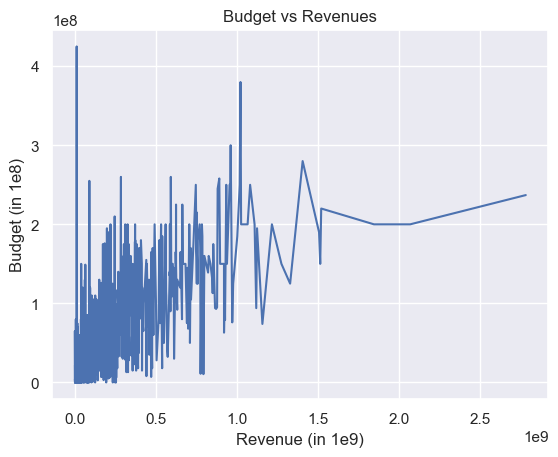

In [82]:
# Plotting the Revenues and Budget columns using A line chart

LineChart = sns.lineplot(data=df,x="revenue",y="budget")
plt.xlabel("Revenue (in 1e9)")
plt.ylabel("Budget (in 1e8)")
plt.title("Budget vs Revenues")
plt.show(LineChart)

### Observations On Both Visuals for The Revenues And Budget Columns:
> - we see no Dependencies between columns.
> - We didn't Find any correlation between both columns in either figures.

<a id='conclusions'></a>
## Conclusions


### In conclusion,The process taken in this data analysis project were really difficult for some values and their data Type. Cleaning was A process when I decided to get rid of the data which can affect the plotting or the average value of the data given.

#### Regarding The FIRST question "Which genres are most popular from 2010 to 2015?":
> - The genres with the most occurrences in movies doesn't necessarily need to be the most popular.
> - Adventure was the most popular genre from 2010 until 2015, based on The data set given.

#### in The SECOND question "What is the relation between Budget and revenues ? Does more budget means more revenue ?":
> Founded that there is no dependeceis between Revenues and Budget.
> Therefore, More Budget spent in a movie doesn't garment the success of that movie.

#### **Limitations**:
> - Dropping the duplicated and NaN values affected the analysis
> - The Data Set Given were only til 2015, which also could change the final results.

## NOTE : The results of the analysis are presented does not state or imply that one change causes another based solely on a correlation, Taking the limitation into consideration.